In [7]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('wine.csv')

# 데이터 상위 5개 행 확인
print(df.head())

# 데이터 정보 및 결측치 확인
print(df.info())
print(df.isnull().sum())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------          

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# 1. 타깃 설정 (Wine → 0, 1, 2로 변환)
y = df['Wine'] - 1  # Wine 컬럼 값이 1,2,3이므로 → 0,1,2로 맞춤
X = df.drop('Wine', axis=1)

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
# ai_env 환경 안에 matplotlib 설치
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00a 0:00:01



📌 Decision Tree 정확도: 0.9444
              precision    recall  f1-score   support

           0     1.0000    0.9167    0.9565        12
           1     0.8750    1.0000    0.9333        14
           2     1.0000    0.9000    0.9474        10

    accuracy                         0.9444        36
   macro avg     0.9583    0.9389    0.9457        36
weighted avg     0.9514    0.9444    0.9450        36


📌 Random Forest 정확도: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36


📌 Bagging (Decision Tree) 정확도: 1.0000
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.000

/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ipykernel_25224/2455830416.py:56: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xm/9m5jkr551jxg7scv_lxlytdm0000gn/T/ip

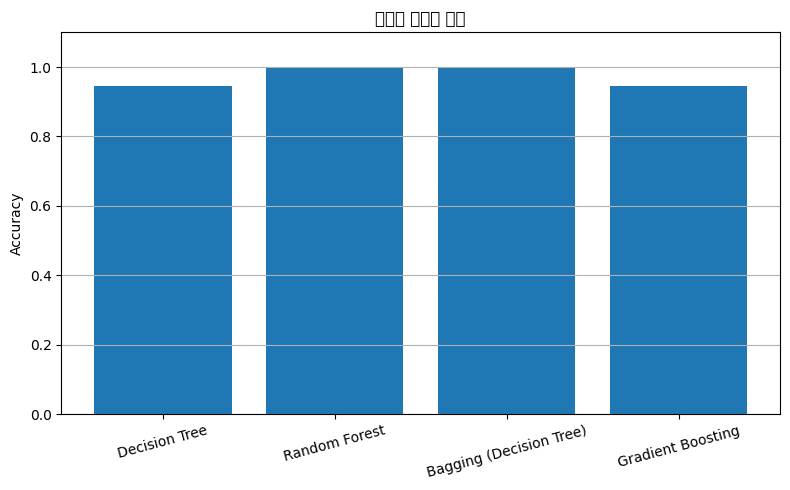

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('wine.csv')  # 경로는 실습 환경에 맞게 조정

# 2. 타깃/특성 분리
y = df['Wine'] - 1  # 클래스 1,2,3 → 0,1,2로 변환
X = df.drop('Wine', axis=1)

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Bagging (Decision Tree)": BaggingClassifier(  # 수정된 부분
        estimator=DecisionTreeClassifier(),         # ← base_estimator → estimator
        n_estimators=100,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 6. 모델 학습 및 평가
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    
    print(f"\n📌 {name} 정확도: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

# 7. 정확도 시각화
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.ylabel('Accuracy')
plt.title('모델별 정확도 비교')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()